In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Peninsular_Zone.xlsx')

In [3]:
df.head()

,Region,Area,Timely sown,Seed,Grain appearance,Hectolitre weight,Protein content,Sedimentation value,Phenol test,Fe content,Zn content
0,Peninsular Zone (PZ),Pune,Irrigated Timely Sown,MACS6222 (C),6.4,82.1,12.4,38.8,8.0,36.7,46.9
1,Peninsular Zone (PZ),Pune,Irrigated Timely Sown,GW322 (C),5.8,80.6,10.9,38.0,7.5,36.1,45.0
2,Peninsular Zone (PZ),Pune,Irrigated Timely Sown,UAS428(d) (C),7.2,83.2,11.4,35.0,0.0,34.0,49.6
3,Peninsular Zone (PZ),Pune,Irrigated Timely Sown,MACS3949(d) (C),7.6,83.6,10.8,38.0,0.0,35.4,42.6
4,Peninsular Zone (PZ),Pune,Irrigated Timely Sown,DDW48(d)(I) (C),7.0,83.2,10.9,30.3,0.0,34.8,40.0


In [4]:
df.shape

(96, 11)

In [5]:
df.isnull().sum()

Region                 0
Area                   0
Timely sown            0
Seed                   0
Grain appearance       0
Hectolitre weight      0
Protein content        0
Sedimentation value    0
Phenol test            0
Fe content             0
Zn content             0
dtype: int64

In [6]:
df.iloc[:,9:]

,Fe content,Zn content
0,36.7,46.9
1,36.1,45.0
2,34.0,49.6
3,35.4,42.6
4,34.8,40.0
...,...,...
91,34.9,36.1
92,33.0,39.0
93,33.3,34.1
94,36.0,31.4


In [7]:
dataframe=pd.DataFrame(df.iloc[:,9:])

In [8]:
dataframe.head()

,Fe content,Zn content
0,36.7,46.9
1,36.1,45.0
2,34.0,49.6
3,35.4,42.6
4,34.8,40.0


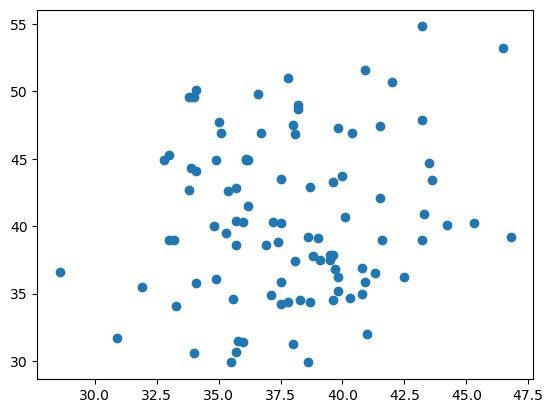

In [9]:
plt.scatter(dataframe['Fe content'],dataframe['Zn content'])
plt.show()

In [10]:
from sklearn.cluster import KMeans

In [11]:
k_rng=range(1,14)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(dataframe[['Fe content','Zn content']])
    sse.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

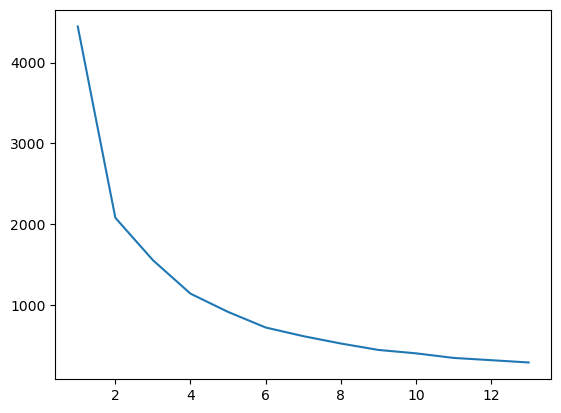

In [12]:
plt.plot(k_rng,sse)
plt.show()

In [13]:
import sklearn.metrics as metrics

In [14]:
kvalue=range(2,12)
sil=[]
for k in kvalue:
    km=KMeans(n_clusters=k)
    labels=km.fit_predict(dataframe[['Fe content','Zn content']])
    score=metrics.silhouette_score(dataframe[['Fe content','Zn content']],labels)
    sil.append(score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

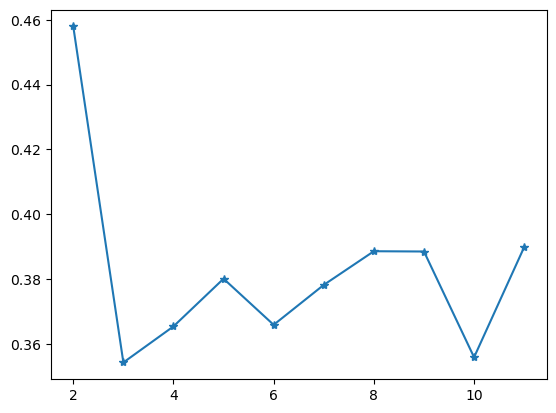

In [15]:
plt.plot(kvalue,sil,marker='*')
plt.show()

In [16]:
km=KMeans(n_clusters=2)
c=km.fit_predict(dataframe)
c

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
dataframe['cluster']=c
dataframe.head()

,Fe content,Zn content,cluster
0,36.7,46.9,0
1,36.1,45.0,0
2,34.0,49.6,0
3,35.4,42.6,0
4,34.8,40.0,1


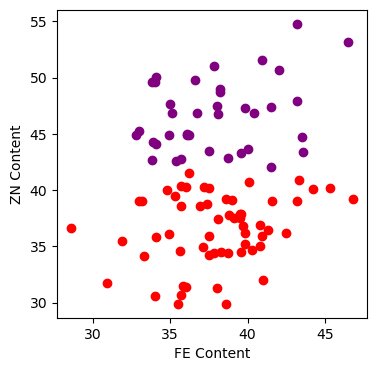

In [18]:
plt.figure(figsize=(4,4))
df1 = dataframe[dataframe.cluster==0]
df2 = dataframe[dataframe.cluster==1]
plt.scatter(df1['Fe content'],df1['Zn content'],color='purple')
plt.scatter(df2['Fe content'],df2['Zn content'],color='red')
plt.xlabel('FE Content')
plt.ylabel('ZN Content')
plt.show()

In [19]:
df['cluster']=c
df.head(95)

,Region,Area,Timely sown,Seed,Grain appearance,Hectolitre weight,Protein content,Sedimentation value,Phenol test,Fe content,Zn content,cluster
0,Peninsular Zone (PZ),Pune,Irrigated Timely Sown,MACS6222 (C),6.4,82.1,12.4,38.8,8.0,36.7,46.9,0
1,Peninsular Zone (PZ),Pune,Irrigated Timely Sown,GW322 (C),5.8,80.6,10.9,38.0,7.5,36.1,45.0,0
2,Peninsular Zone (PZ),Pune,Irrigated Timely Sown,UAS428(d) (C),7.2,83.2,11.4,35.0,0.0,34.0,49.6,0
3,Peninsular Zone (PZ),Pune,Irrigated Timely Sown,MACS3949(d) (C),7.6,83.6,10.8,38.0,0.0,35.4,42.6,0
4,Peninsular Zone (PZ),Pune,Irrigated Timely Sown,DDW48(d)(I) (C),7.0,83.2,10.9,30.3,0.0,34.8,40.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
90,Peninsular Zone (PZ),Niphad,Restricted Irrigated Timely Sown,MACS6753,6.0,82.5,12.4,45.0,6.0,40.8,36.9,1
91,Peninsular Zone (PZ),Niphad,Restricted Irrigated Timely Sown,DBW325,6.4,80.9,11.6,53.4,8.0,34.9,36.1,1
92,Peninsular Zone (PZ),Niphad,Restricted Irrigated Timely Sown,UAS3014,5.8,80.3,11.8,57.3,8.0,33.0,39.0,1
93,Peninsular Zone (PZ),Niphad,Restricted Irrigated Timely Sown,AKDW2997-16(d) (C),5.6,81.7,11.2,36.9,0.0,33.3,34.1,1


In [20]:
df.to_csv('Peninsular_Zone_Full_without_standardScalar.csv')

In [21]:
df1.mean()

Fe content    37.881579
Zn content    46.668421
cluster        0.000000
dtype: float64

In [22]:
df2.mean()

Fe content    37.963793
Zn content    36.508621
cluster        1.000000
dtype: float64

In [23]:
import numpy as np
# Calculate the standard deviation
standard_deviation = np.std(df1['Fe content'])

standard_deviation


3.4659133574949696

In [24]:
import numpy as np
# Calculate the standard deviation
standard_deviation = np.std(df1['Zn content'])

standard_deviation


3.151032016670587

In [25]:
import numpy as np
# Calculate the standard deviation
standard_deviation = np.std(df2['Fe content'])

standard_deviation


3.4403637676480576

In [26]:
import numpy as np
# Calculate the standard deviation
standard_deviation = np.std(df2['Zn content'])

standard_deviation


3.100293895009634